In [2]:
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import random
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns; sns.set()
import DataTypes as dt
import Lattice as lat
import LatticePlot as lp
import BuildMatrix as bm
np.core.arrayprint._line_width = 160

#### Random orthonormal vectors

In [3]:
vecs = np.matrix(bm.randOrthoNormals(d=5, count=2))
(vecs, np.transpose(vecs) * vecs)

(matrix([[-0.77764338, -0.03886861],
         [-0.20635389, -0.33404893],
         [-0.50837129,  0.30480459],
         [ 0.0237947 , -0.85562095],
         [-0.306074  , -0.24881218]]), matrix([[ 1.,  0.],
         [ 0.,  1.]]))

In [5]:
bm.randOrthoNormals(d=5, count=2)

array([[-0.97390604, -0.07187731],
       [ 0.08731928, -0.07749102],
       [ 0.01123891, -0.81932035],
       [ 0.00591198,  0.49333359],
       [-0.20909594,  0.27233236]])

#### Create tuples that label lattice points

In [6]:
lat.LatticeTuplesD1(None, x_len=2), lat.LatticeTuplesD1("a", x_len=2)

([0, 1], [('a', 0), ('a', 1)])

In [7]:
lat.LatticeTuplesD2(None, x_len=2, y_len=2), lat.LatticeTuplesD2("a", x_len=2, y_len=1)

([(0, 0), (0, 1), (1, 0), (1, 1)], [('a', 0, 0), ('a', 1, 0)])

In [8]:
lat.LatticeTuplesD3(None, x_len=2, y_len=1, z_len=2), lat.LatticeTuplesD3("a", x_len=2, y_len=1, z_len=1)

([(0, 0, 0), (0, 0, 1), (1, 0, 0), (1, 0, 1)],
 [('a', 0, 0, 0), ('a', 1, 0, 0)])

#### some constants that are used in the next few sections

In [9]:
dim = 2; stepsX = 3; stepsY = 4; stepsZ = 1

In [10]:
[(x, y) for x in range(stepsX) for y in range(stepsY)]

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3)]

#### For creating 2d numpy arrays of uniform lattices over the unit N-cube for N = {2, 3}

In [11]:
lat.MakeD2UnitLattice(span_x=stepsX, span_y=stepsY)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.5       ,  0.5       ,  0.5       ,  0.5       ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.        ,  0.33333333,  0.66666667,  1.        ,  0.        ,  0.33333333,  0.66666667,  1.        ,  0.        ,  0.33333333,  0.66666667,  1.        ]])

In [12]:
lat.MakeD3UnitLattice(span_x=stepsX, span_y=stepsY, span_z=stepsZ)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.5       ,  0.5       ,  0.5       ,  0.5       ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.        ,  0.33333333,  0.66666667,  1.        ,  0.        ,  0.33333333,  0.66666667,  1.        ,  0.        ,  0.33333333,  0.66666667,  1.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

#### Color mapping

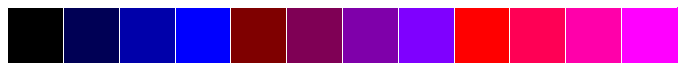

In [13]:
cr = lp.MakeRedBlueGridColorer(span_x=stepsX, span_y=stepsY)
clrs = [cr((x, y)) for x in range(stepsX) for y in range(stepsY)]
sns.palplot(clrs)

#### Create a 2d lattice of vectors in N dimenstional space, packaged as TaggedNVectors

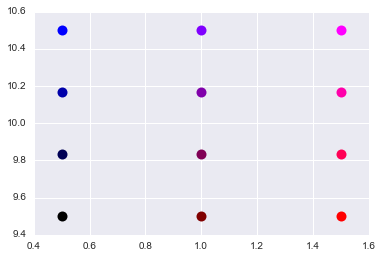

In [14]:
rasty = lat.MakeD2Lattice(spans=np.identity(dim), steps1=stepsX, steps2=stepsY, center=np.array([1, 10]))
r = lp.PlotTaggedNVectorsGrid(rasty, span_x=stepsX, span_y=stepsY, figsize=(6, 4), markersize=10)

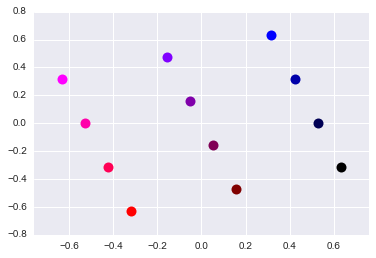

In [15]:
q = lat.MakeRndOrthoD2Lattice(dim=dim, steps1=stepsX, steps2=stepsY, seed=1234)
outs = lp.PlotTaggedNVectorsGrid(q, span_x=stepsX, span_y=stepsY, figsize=(6, 4), markersize=10)

#### Create a set of uniform gaussians around each of the provided vectors

In [16]:
def drawAroundVecs(tvs:dt.TaggedNVectors, blobStdev:float=1.0, pointsPerBlob:int=10):
    blobVecs = tvs.vectors
    blobTags = tvs.tags
    dim = len(blobVecs[0])
    return dt.TaggedNVectors(
        vectors = np.vstack(np.array([np.random.multivariate_normal(
                                        blobVecs[i], 
                                        np.matrix(np.diag([blobStdev] * dim)), 
                                        pointsPerBlob) 
                              for i in range(len(blobVecs))])),
        tags = [i for i in blobTags for a in range(pointsPerBlob)]
    )

In [17]:
testCenters = dt.TaggedNVectors(vectors=np.array([[0,0], [1,1]]), tags=[(0,1), (1,1)])
blobs = drawAroundVecs(tvs=testCenters, blobStdev=0.25, pointsPerBlob=50)

rr = lp.PlotTaggedNVectors(tvs=blobs, markersize=5)

TypeError: __new__() got an unexpected keyword argument 'vectors'

#### Create a 2d lattice of gaussians in the plane specified by the two input vectors.

In [18]:
def GetUnitMatrix(dim:int, s:float):
    '''returns a diagonal matrix with all s on the diagonal'''
    return np.identity(dim) * s

In [19]:
q = GetUnitMatrix(3, 33)
q * 3


array([[ 99.,   0.,   0.],
       [  0.,  99.,   0.],
       [  0.,   0.,  99.]])

In [20]:
quak = np.matrix([[1,2], [3,4]])
expp = np.matrix(np.diag([2,2]))
type(quak * expp)

numpy.matrixlib.defmatrix.matrix

In [21]:
rasty = lat.MakeD2Lattice(spans=np.identity(dim), steps1=stepsX, steps2=stepsY)
def d2LatticeOfGaussians(spans:np.matrixlib.defmatrix.matrix=np.identity(2), arrayRadius:float=1, steps1:int=3, steps2:int=4, blobStdev:float=1.0, pointsPerBlob:int=10):
    d2Lattice = rasterOverCenteredSquare(v1=v1, v2=v2, radius=arrayRadius, stride=stride)
    return drawAroundVecs(tvs=TaggedNVectors(vectors=d2Lattice.vectors, tags=d2Lattice.coords), 
                          blobStdev=blobStdev, 
                          pointsPerBlob=pointsPerBlob)

In [22]:
blobStride = 4
blobsL = d2LatticeOfGaussians(
                          arrayRadius=3, 
                          steps1=blobStride, 
                          steps2=blobStride, 
                          blobStdev=0.01, 
                          pointsPerBlob=50)
r4 = PlotTaggedNVectorsGrid(blobsL, span_x=blobStride, span_y=blobStride, figsize=(6,6), markersize=5)

NameError: name 'rasterOverCenteredSquare' is not defined

#### Samples from the N dimensional symmetric gaussian.

#### Nested lattices

In [ ]:
dim = 5
count = 10
mean = [np.random.randn() for i in range(dim)]
np.random.multivariate_normal(mean, np.matrix(np.diag([1] * dim)), count)

In [ ]:
import sklearn
from sklearn.manifold import TSNE

### Stride 7, pointsPerBlob=100, dim = 100, arrayRadius=3 - vary seed, stdev

In [ ]:
strideA = 7
ppb = 100
dim = 100
arrayRadius=3
def varyStdevA(stdev, seed):
    orthoPair = randOrthoNormals(dim=dim, count=2)
    gridBlobs = d2LatticeOfGaussians(v1=orthoPair[0],
                          v2=orthoPair[1],
                          arrayRadius=arrayRadius,
                          stride=strideA,
                          blobStdev=stdev,
                          pointsPerBlob=ppb)
    grid_proj = TSNE(n_components=2, random_state=seed, init='random').fit_transform(gridBlobs.vectors)
        
    tsnu = TaggedNVectors(vectors=grid_proj, tags=gridBlobs.tags)
    r77 = PlotTaggedNVectorsGrid(tsnu, span_x=strideA, span_y=strideA, figsize=(6,6), markersize=3)

In [ ]:
varyStdevA(0.075, 98154190)

In [ ]:
varyStdevA(0.1, 98154190)

In [ ]:
varyStdevA(0.15, 82154190)

### Stride 7, pointsPerBlob=100, dim = 100, arrayRadius=4 - vary stdev, seed

In [ ]:
strideA = 7
ppb = 100
dim = 100
arrayRadius=4
def varyStdevB(stdev, seed):
    orthoPair = randOrthoNormals(dim=dim, count=2)
    gridBlobs = d2LatticeOfGaussians(v1=orthoPair[0],
                          v2=orthoPair[1],
                          arrayRadius=arrayRadius,
                          stride=strideA,
                          blobStdev=stdev,
                          pointsPerBlob=ppb)
    grid_proj = TSNE(n_components=2, random_state=seed, init='random').fit_transform(gridBlobs.vectors)
        
    tsnu = TaggedNVectors(vectors=grid_proj, tags=gridBlobs.tags)
    r77 = PlotTaggedNVectorsGrid(tsnu, span_x=strideA, span_y=strideA, figsize=(6,6), markersize=3)

In [ ]:
varyStdevB(0.075, 98154190)

In [ ]:
varyStdevB(0.1, 98154190)

In [ ]:
varyStdevB(0.15, 98154190)

### Stride=7, pointsPerBlob=200, dim=100, arrayRadius=4 - vary stdev, seed

In [ ]:
strideA = 7
ppb = 200
dim = 100
arrayRadius=4
def varyStdevC(stdev, seed):
    orthoPair = randOrthoNormals(dim=dim, count=2)
    gridBlobs = d2LatticeOfGaussians(v1=orthoPair[0], 
                          v2=orthoPair[1], 
                          arrayRadius=arrayRadius, 
                          stride=strideA, 
                          blobStdev=stdev, 
                          pointsPerBlob=ppb)
    grid_proj = TSNE(n_components=2, random_state=seed, init='random').fit_transform(gridBlobs.vectors)
        
    tsnu = TaggedNVectors(vectors=grid_proj, tags=gridBlobs.tags)
    r77 = PlotTaggedNVectorsGrid(tsnu, span_x=strideA, span_y=strideA, figsize=(6,6), markersize=3)

In [ ]:
varyStdevC(0.075, 98154190)

In [ ]:
varyStdevC(0.1, 98154190)

In [ ]:
varyStdevC(0.15, 98154190)

### Stride=6, pointsPerBlob=200, dim = 100, arrayRadius=5 - vary stdev, seed

In [ ]:
strideA = 6
ppb = 200
dim = 100
arrayRadius=5
def varyStdevD(stdev, seed):
    orthoPair = randOrthoNormals(dim=dim, count=2)
    gridBlobs = d2LatticeOfGaussians(v1=orthoPair[0], 
                          v2=orthoPair[1], 
                          arrayRadius=arrayRadius, 
                          stride=strideA, 
                          blobStdev=stdev, 
                          pointsPerBlob=ppb)
    grid_proj = TSNE(n_components=2, random_state=seed, init='random').fit_transform(gridBlobs.vectors)
        
    tsnu = TaggedNVectors(vectors=grid_proj, tags=gridBlobs.tags)
    r77 = PlotTaggedNVectorsGrid(tsnu, span_x=strideA, span_y=strideA, figsize=(6,6), markersize=3)

In [ ]:
varyStdevD(0.1, 98154190)

In [ ]:
varyStdevD(0.15, 98154190)

In [ ]:
varyStdevD(0.2, 98154190)

In [ ]:
strideA = 2
ppb = 2
dim = 3
arrayRadius=10
orthoPair = randOrthoNormals(dim=dim, count=2)
gridBlobs = d2LatticeOfGaussians(v1=orthoPair[0], 
                      v2=orthoPair[1], 
                      arrayRadius=arrayRadius, 
                      stride=strideA, 
                      blobStdev=0.001, 
                      pointsPerBlob=ppb)

In [ ]:
gridBlobs

In [ ]:
tup = (1, 2)
(tup, 1, 2)